### Multiple Linear Regression
---

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:
df = pd.read_csv('./datos_limpios_3.csv')
df.shape

(184, 5)

In [31]:
df.head()

,Precio,Dormitorios,Banos,Parqueos,Tamano de la propiedad
0,2100,2,2,4,196
1,3100,4,2,2,350
2,3500,3,5,2,459
3,3000,4,2,2,350
4,2250,3,3,2,325


### EDA
---

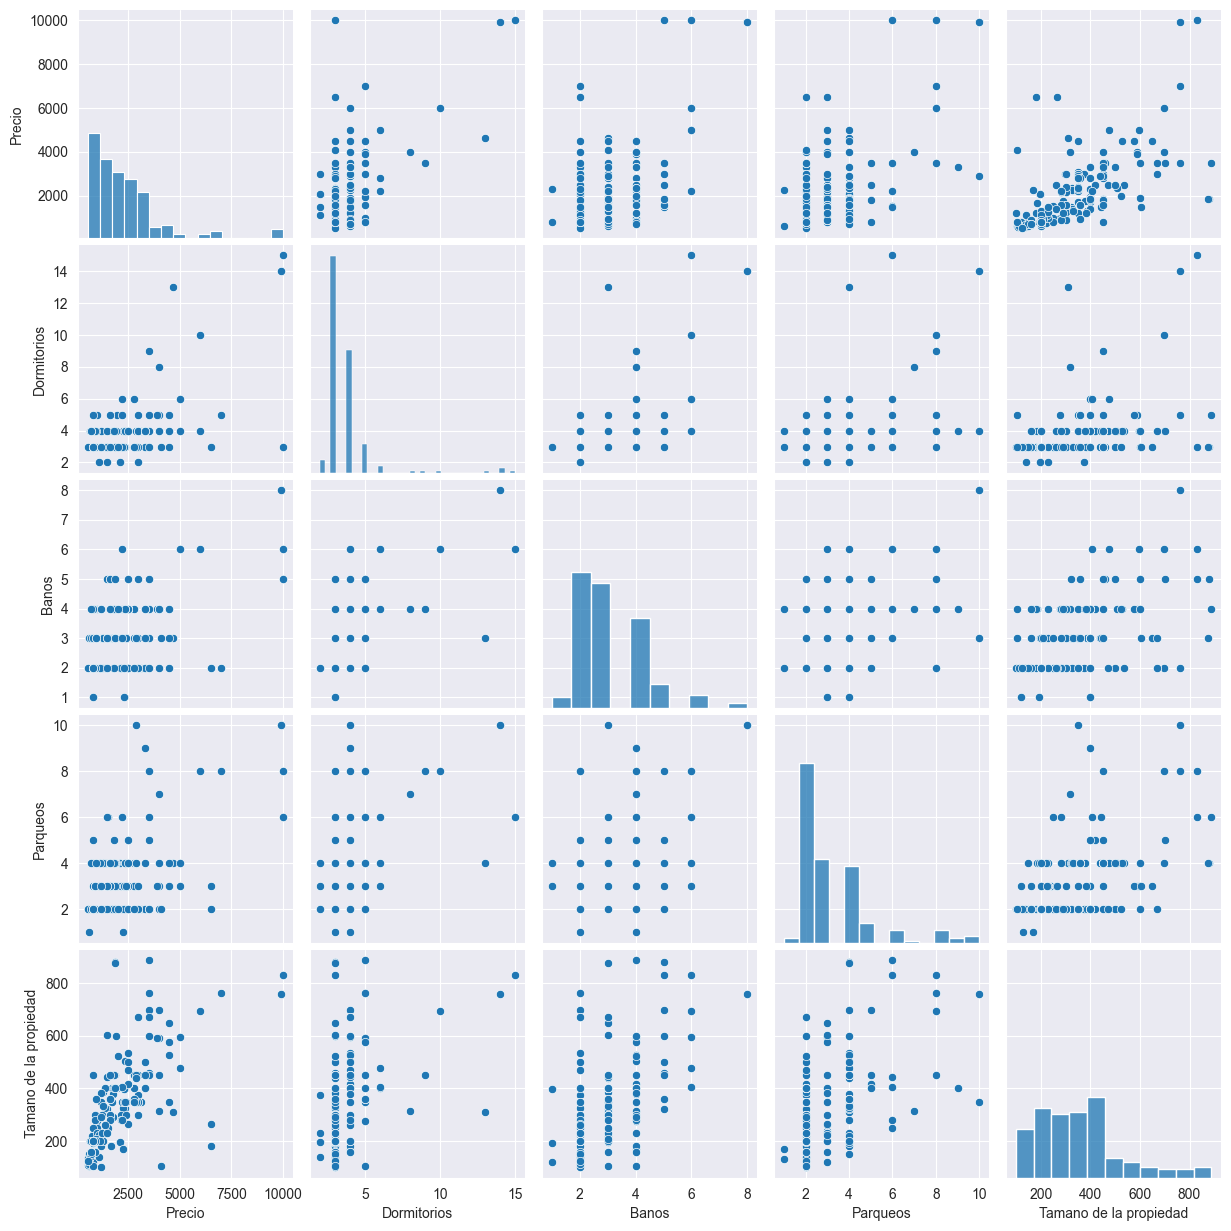

In [32]:
# Pairplot (relationship between variables)
sns.pairplot(df)
plt.show()

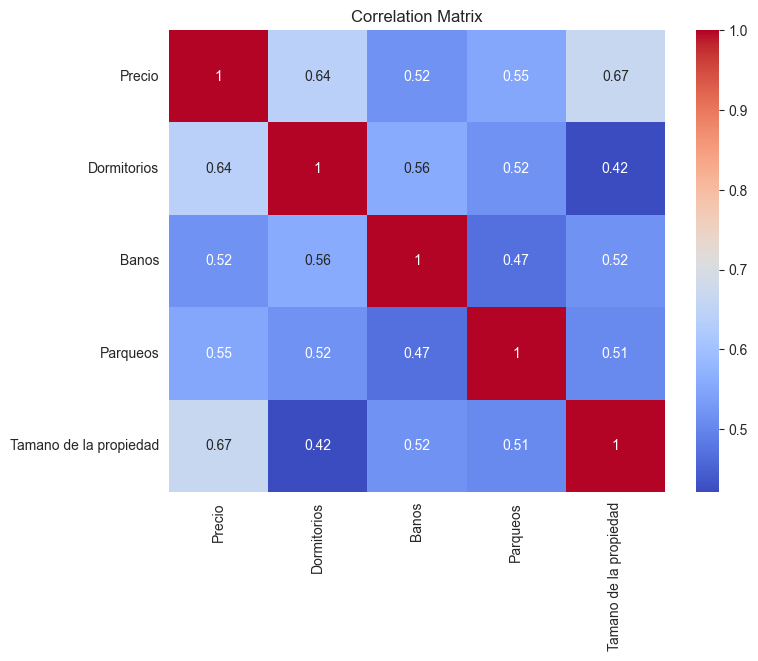

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data prep
---

In [34]:
X = df.drop('Precio', axis=1) # Features (Independent variables)
y = df['Precio'] # Target (Dependent variable)

In [35]:
X.shape, y.shape

((184, 4), (184,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.head()

,Dormitorios,Banos,Parqueos,Tamano de la propiedad
65,4,3,3,350
67,4,4,3,400
31,5,4,2,350
12,3,3,2,325
41,4,4,5,418


## Model
---

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
print(f'Intercept: {model.intercept_:.2f}')
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature.capitalize()}: {coef:.2f}")

Intercept: -1094.55
Dormitorios: 274.53
Banos: 57.49
Parqueos: 190.78
Tamano de la propiedad: 4.31


## Model evaluation
---

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred[:10]

array([ 872.30928535, 2989.64110381, 1253.86713544, 1555.6745773 ,
       2124.06424668, 2009.14841103, 1824.82380119, 2505.67780667,
       1709.81844295, 1303.46277372])

In [42]:
print(f'R^2 Score: {r2_score(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')

R^2 Score: 0.70
MSE: 978401.53


## Results
---

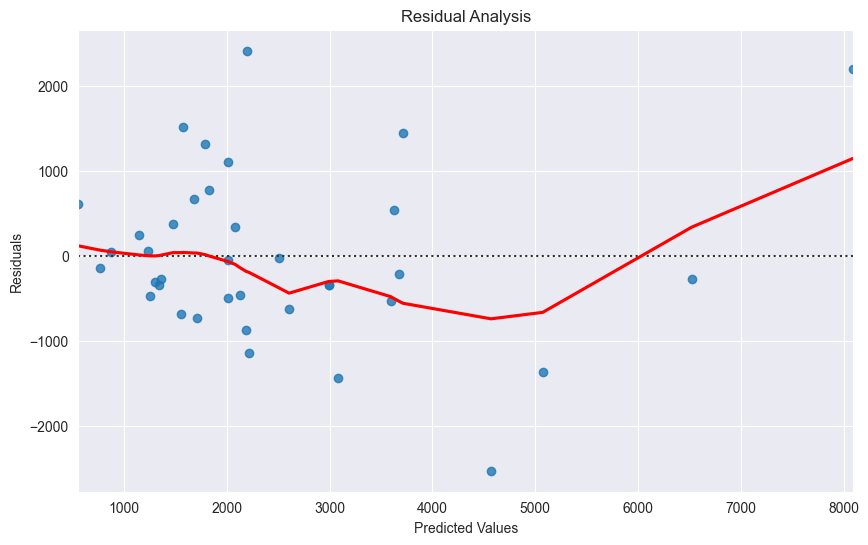

In [43]:
# Residual plot
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

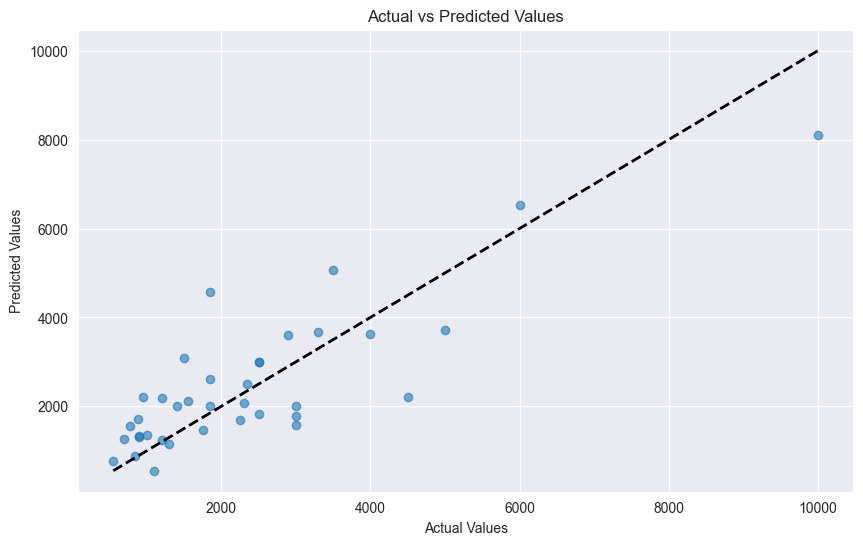

In [44]:
# Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

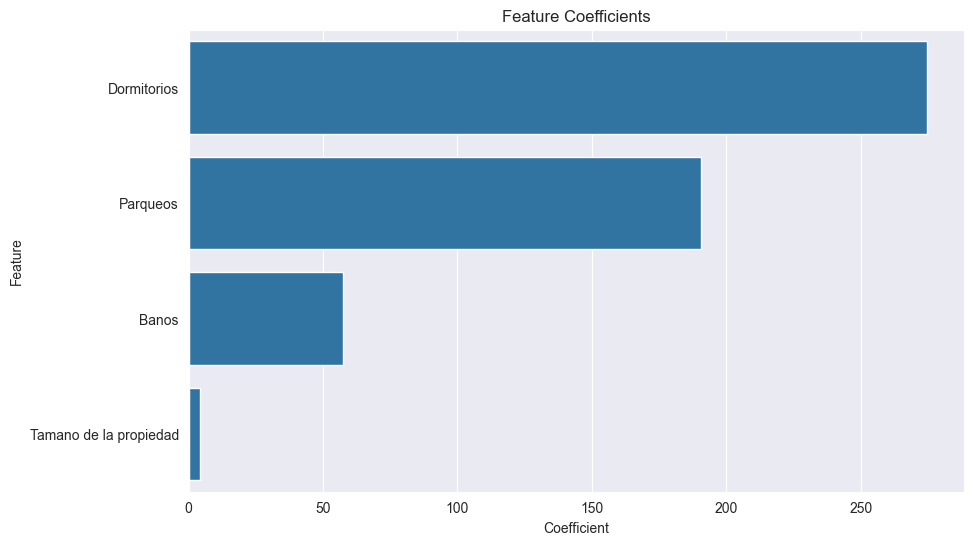

In [45]:
# Coefficient visualization
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Coefficients')
plt.show()

In [46]:
# Seleccionar las variables independientes y dependiente
X = df[['Dormitorios', 'Banos']]  # Features: dormitorios y baños
y = df['Precio']  # Target: Precio

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Coeficientes e intercepto
print("=== Modelo 1: dormitorios y baños vs Precio ===")
print(f"Intercepto: {model_1.intercept_:.2f}")
for feature, coef in zip(X.columns, model_1.coef_):
    print(f"{feature.capitalize()}: {coef:.2f}")

# Predicciones
y_pred = model_1.predict(X_test)

# Evaluación del modelo
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

=== Modelo 1: dormitorios y baños vs Precio ===
Intercepto: -463.22
Dormitorios: 418.38
Banos: 367.87
R^2 Score: 0.76
MSE: 773961.01


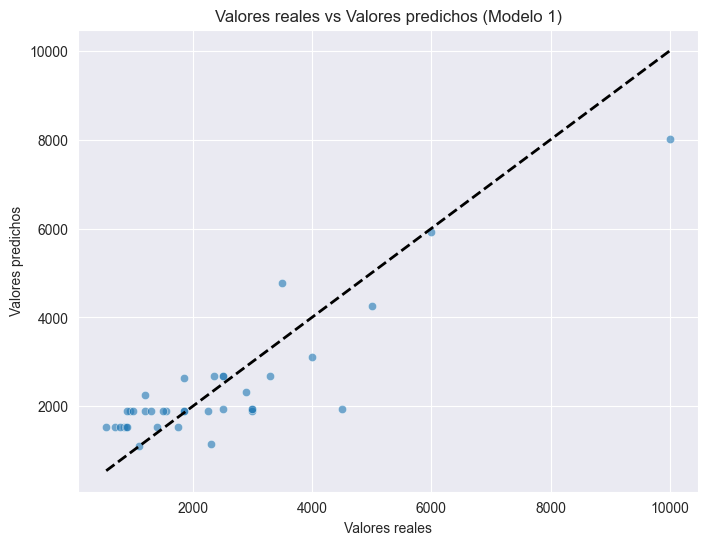

In [47]:
# Gráfico de predicciones vs valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Valores predichos (Modelo 1)')
plt.show()


In [48]:
# Seleccionar las variables independientes y dependiente
X = df[['Dormitorios', 'Tamano de la propiedad']]  # Features: dormitorios y tamaño de propiedad
y = df['Precio']  # Target: Precio

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

# Coeficientes e intercepto
print("\n=== Modelo 2: dormitorios y tamaño de propiedad vs Precio ===")
print(f"Intercepto: {model_2.intercept_:.2f}")
for feature, coef in zip(X.columns, model_2.coef_):
    print(f"{feature.capitalize()}: {coef:.2f}")

# Predicciones
y_pred = model_2.predict(X_test)

# Evaluación del modelo
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


=== Modelo 2: dormitorios y tamaño de propiedad vs Precio ===
Intercepto: -963.26
Dormitorios: 364.43
Tamano de la propiedad: 5.20
R^2 Score: 0.75
MSE: 805398.71


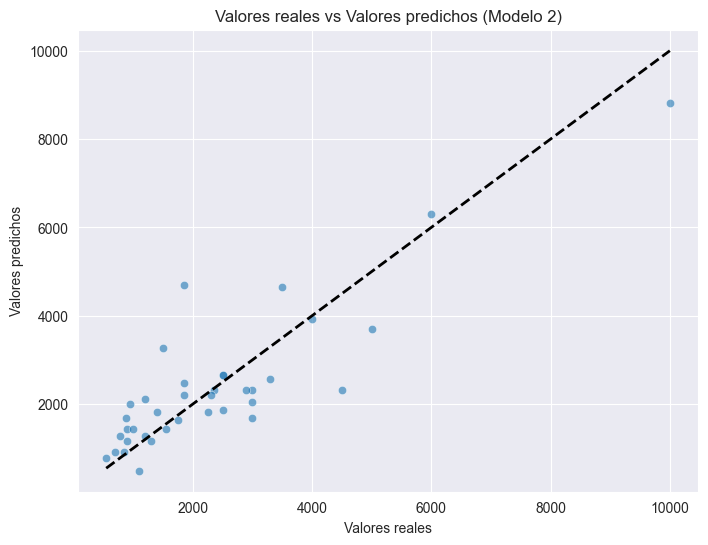

In [49]:
# Gráfico de predicciones vs valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Valores predichos (Modelo 2)')
plt.show()